In [ ]:
#import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data1=pd.read_csv('fulfilment_center_info.csv')
data1.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [ ]:
data1.shape

(77, 5)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [ ]:
data2=pd.read_csv('meal_info.csv')
data2.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [ ]:
data2.shape

(51, 3)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [ ]:
data3=pd.read_csv('train.csv')
data3.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0.0,0.0,177.0
1,1466964,1,55,1993,136.83,135.83,0.0,0.0,270.0
2,1346989,1,55,2539,134.86,135.86,0.0,0.0,189.0
3,1338232,1,55,2139,339.50,437.53,0.0,0.0,54.0
4,1448490,1,55,2631,243.50,242.50,0.0,0.0,40.0


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26401 entries, 0 to 26400
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     26401 non-null  int64  
 1   week                   26401 non-null  int64  
 2   center_id              26401 non-null  int64  
 3   meal_id                26401 non-null  int64  
 4   checkout_price         26401 non-null  float64
 5   base_price             26401 non-null  float64
 6   emailer_for_promotion  26401 non-null  float64
 7   homepage_featured      26401 non-null  float64
 8   num_orders             26401 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 2.0 MB


In [ ]:
test=pd.read_csv('test_QoiMO9B.csv')
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146.0,55.0,1885.0,158.11,159.11,0.0,0.0
1,1127204,146.0,55.0,1993.0,160.11,159.11,0.0,0.0
2,1212707,146.0,55.0,2539.0,157.14,159.14,0.0,0.0
3,1082698,146.0,55.0,2631.0,162.02,162.02,0.0,0.0
4,1400926,146.0,55.0,1248.0,163.93,163.93,0.0,0.0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27557 entries, 0 to 27556
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     27557 non-null  int64  
 1   week                   27556 non-null  float64
 2   center_id              27556 non-null  float64
 3   meal_id                27556 non-null  float64
 4   checkout_price         27556 non-null  float64
 5   base_price             27556 non-null  float64
 6   emailer_for_promotion  27556 non-null  float64
 7   homepage_featured      27556 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.7 MB


In [ ]:
#add the data1 and data2
master=pd.concat([data1,data2],axis=1)
master.head()

,center_id,city_code,region_code,center_type,op_area,meal_id,category,cuisine
0,11,679,56,TYPE_A,3.7,1885.0,Beverages,Thai
1,13,590,56,TYPE_B,6.7,1993.0,Beverages,Thai
2,124,590,56,TYPE_C,4.0,2539.0,Beverages,Thai
3,66,648,34,TYPE_A,4.1,1248.0,Beverages,Indian
4,94,632,34,TYPE_C,3.6,2631.0,Beverages,Indian


# Data Preprocessing 
### fill the null values with mean and ffill

In [ ]:
#fill the null values with mean and ffill methods
master['meal_id'].fillna(value=master['meal_id'].mean(),inplace=True)
master['category'].fillna(method='ffill',inplace=True)
master['cuisine'].fillna(method='ffill',inplace=True)
master.isna().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
meal_id        0
category       0
cuisine        0
dtype: int64

In [ ]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
 5   meal_id      77 non-null     float64
 6   category     77 non-null     object 
 7   cuisine      77 non-null     object 
dtypes: float64(2), int64(3), object(3)
memory usage: 4.9+ KB


# Explore Data Analysis

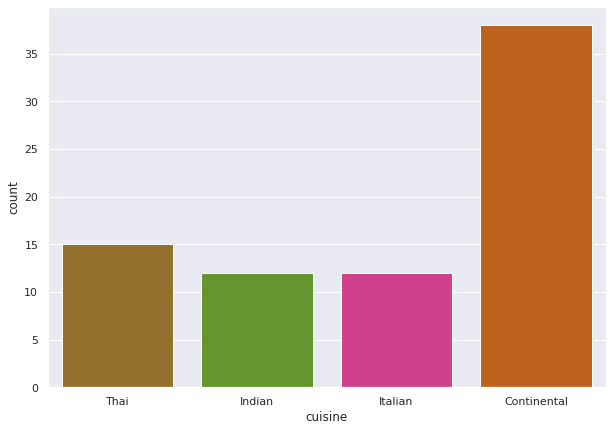

In [ ]:
#Lets' visualize the center_id
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(master['cuisine'],palette='Dark2_r')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f97c464f690>,
      dtype=object)

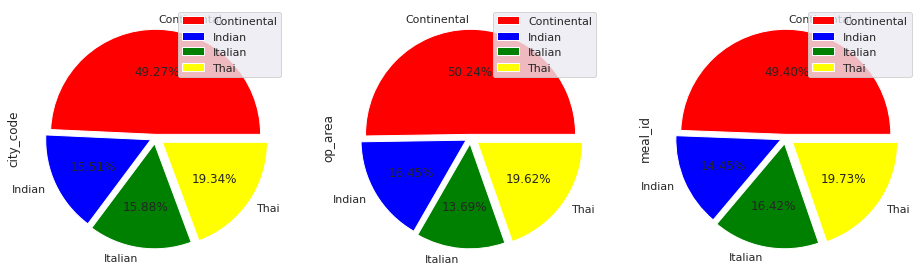

In [ ]:
category=master.groupby(['cuisine'])[['city_code','op_area','meal_id']].sum()
category.plot.pie(subplots=True,autopct="%1.2f%%",label=category.index,figsize=(16,7),
                 explode=[0.03,0.05,0.06,0.08],colors=['red','blue','green','yellow'])

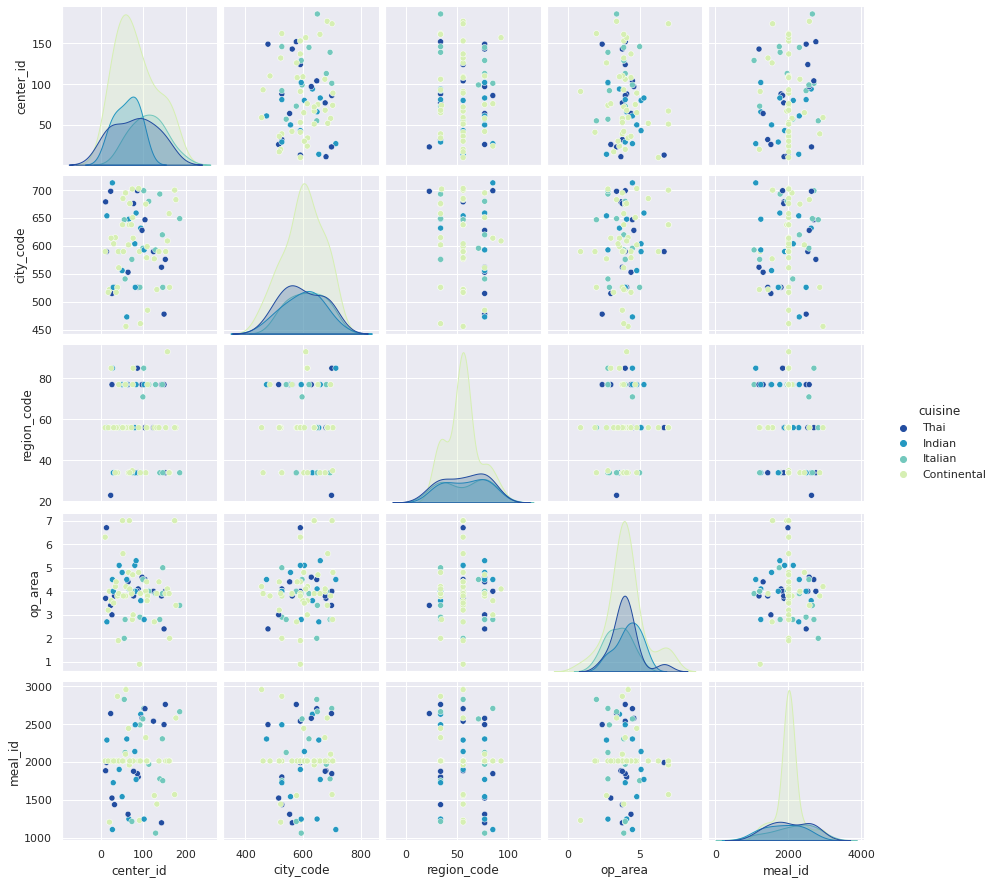

In [ ]:
sns.set(rc={'figure.figsize':(13,8)})
sns.pairplot(master,palette='YlGnBu_r',hue='cuisine')

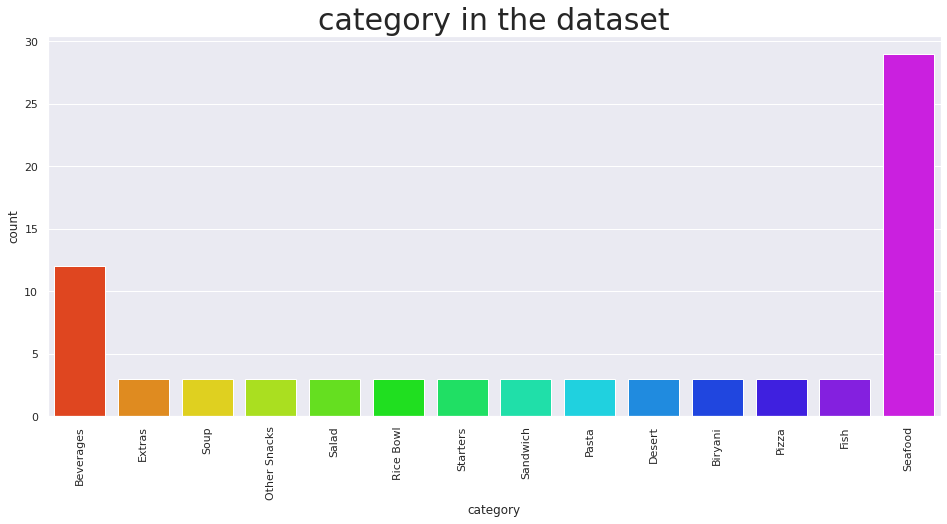

In [ ]:
plt.figure(figsize=(16,7))
sns.countplot(master['category'],palette='gist_rainbow')
plt.title("category in the dataset",fontsize=30)
plt.xticks(rotation=90)
plt.show()

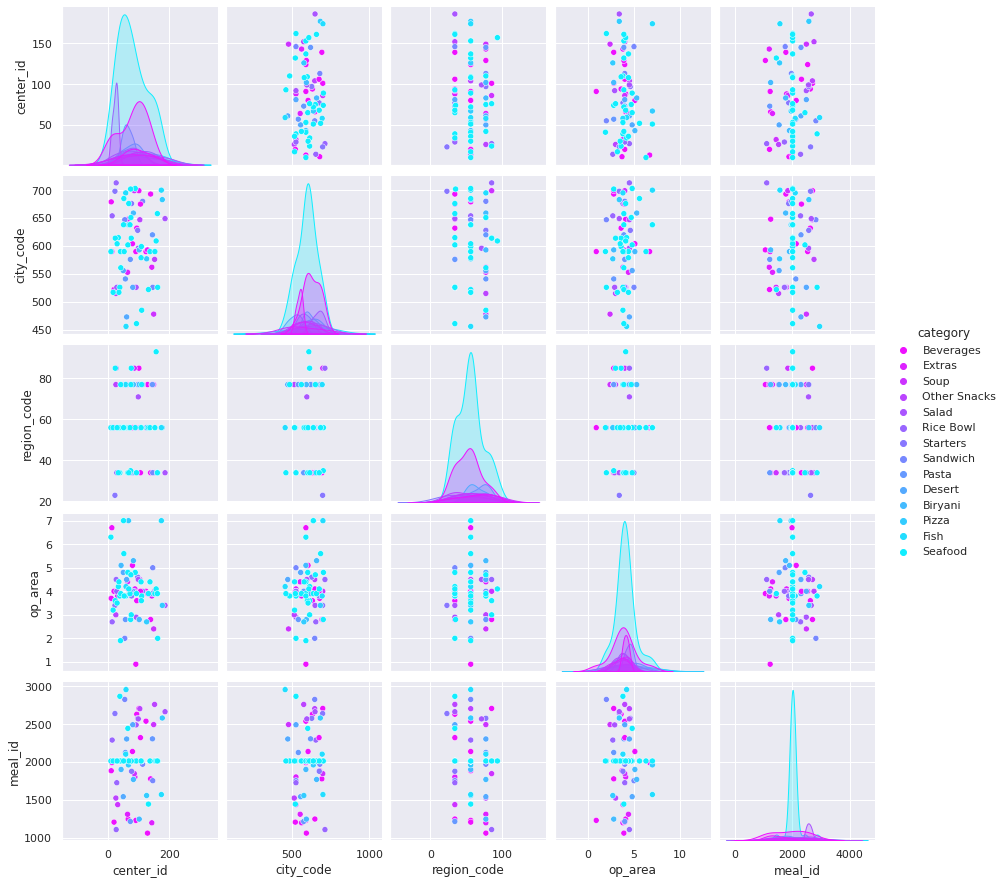

In [ ]:
sns.set(rc={'figure.figsize':(13,8)})
sns.pairplot(master,palette='cool_r',hue='category')

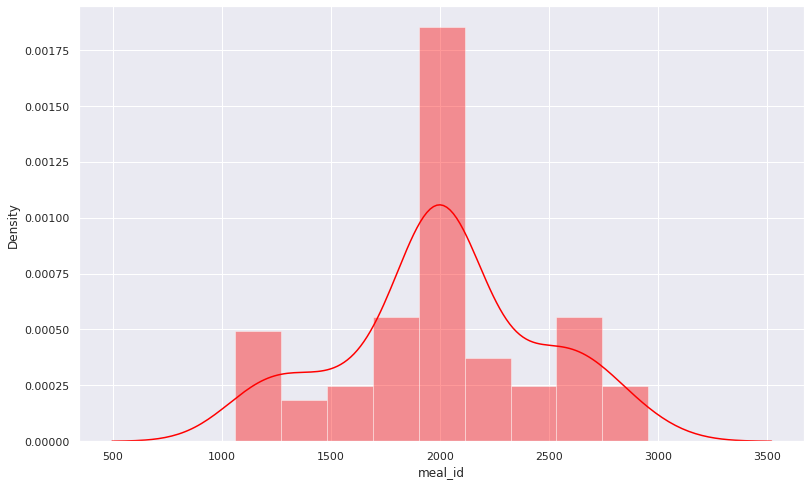

In [ ]:
sns.set(rc={'figure.figsize':(13,8)})
sns.distplot(master['meal_id'],kde=True,color='red')

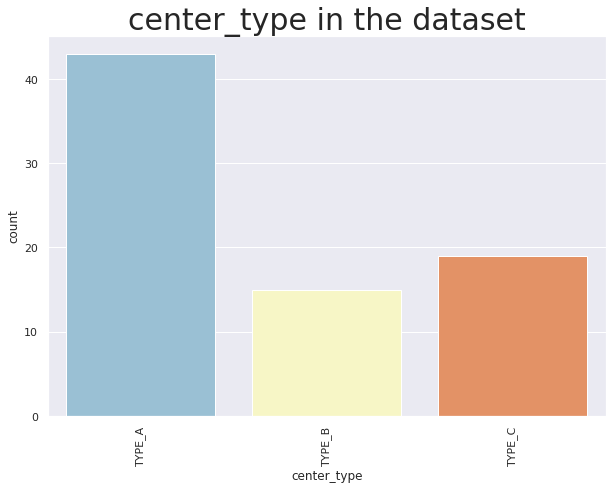

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(master['center_type'],palette='RdYlBu_r')
plt.title("center_type in the dataset",fontsize=30)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#train columns
data3.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

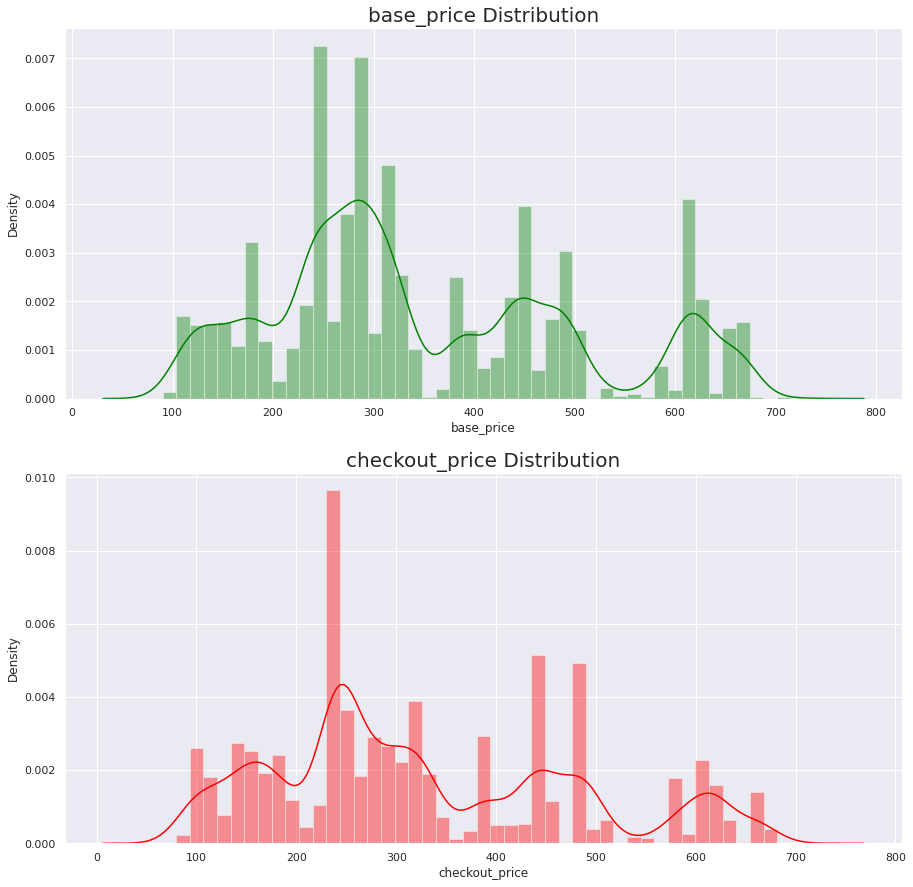

In [ ]:
fig, axs = plt.subplots(ncols=1, nrows = 2, figsize = (15,15))
sns.distplot(data3['checkout_price'], color = 'red',  ax = axs[1])
sns.distplot(data3['base_price'], color = 'green',  ax = axs[0])
axs[1].set_title('checkout_price Distribution', fontsize = 20)
axs[0].set_title('base_price Distribution', fontsize = 20)
plt.show()

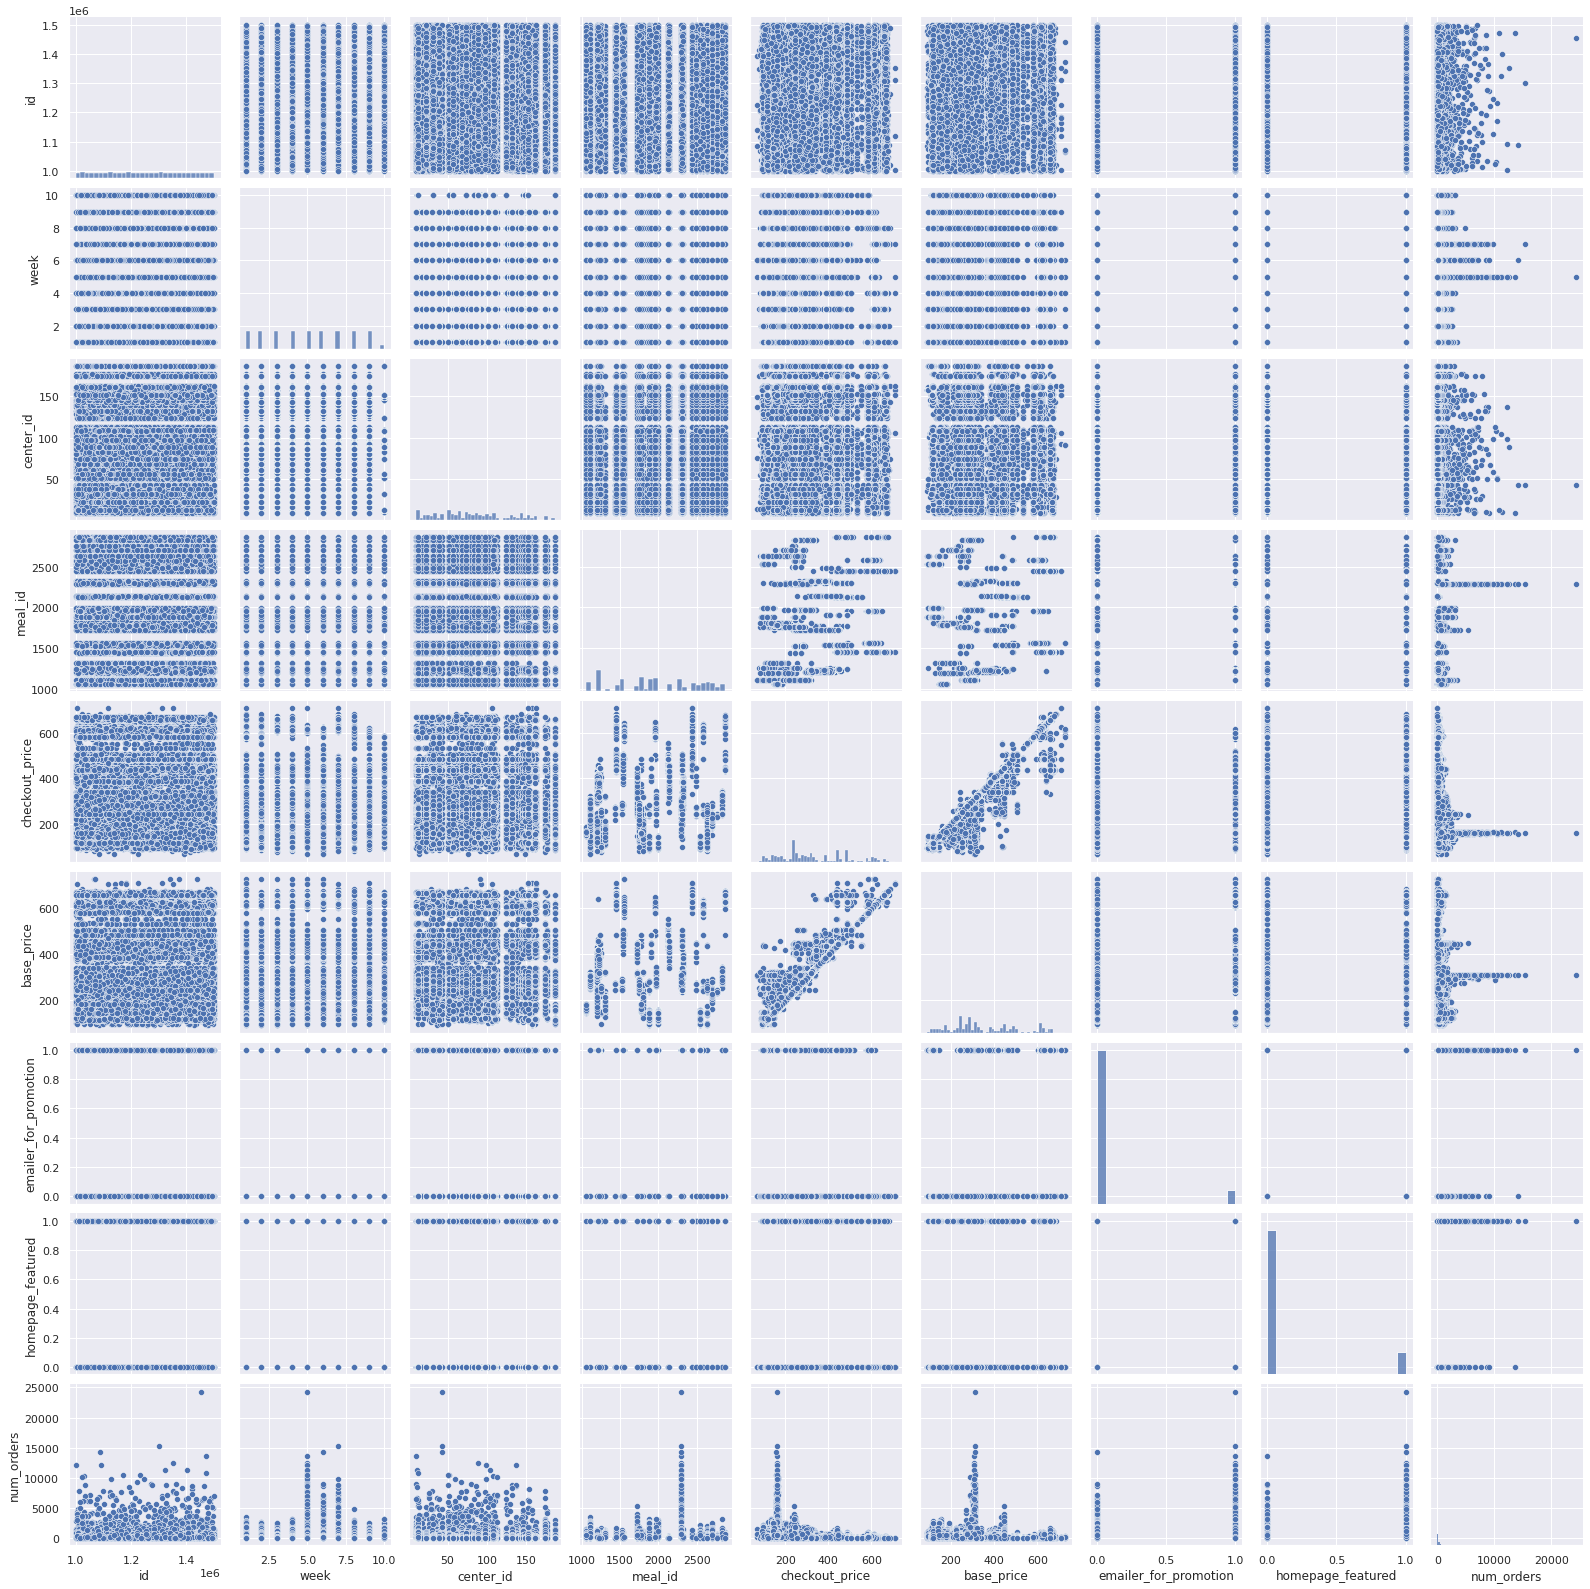

In [ ]:
sns.pairplot(data3)

# Machine Learining Model Buliding

In [ ]:
#Let's check the columns in the train dataset
data3.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [ ]:
#check the null values
data3.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    1
homepage_featured        1
num_orders               1
dtype: int64

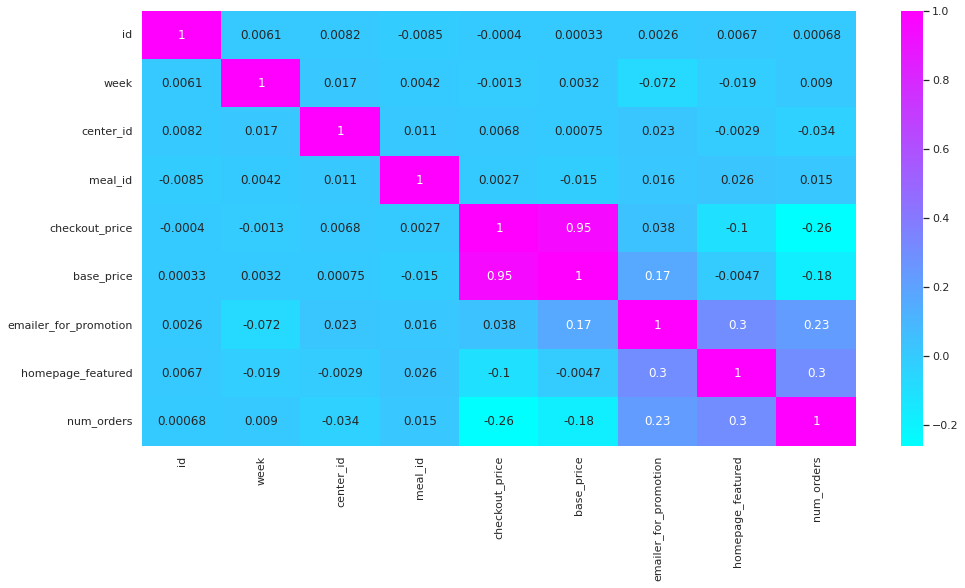

In [ ]:
#to visualize the correlation matrix
sns.set(rc={'figure.figsize':(16,8)})
sns.heatmap(data3.corr(),annot=True,cmap='cool')

In [ ]:
#import the  sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
data3.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    1
homepage_featured        1
num_orders               1
dtype: int64

In [ ]:
data3.dropna(inplace=True)

In [ ]:
#divided the data into input and target variable
X=data3.drop(['id','num_orders'],axis=1)
y=data3['num_orders']
scaler=MinMaxScaler(feature_range=(0, 1))
X=scaler.fit_transform(X)

In [ ]:
#divided the data into train and test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=120,shuffle=True)


# Linear Regression 

In [ ]:
#install the LinearRegression model
linear=LinearRegression()
#fit the model
linear.fit(X_train,y_train)
linear_pred=linear.predict(X_test)
mse=mean_squared_error(y_test,linear_pred)
rmse=np.sqrt(mse)
print(f'the linear model r2_score is {r2_score(y_test,linear_pred)*100:.2f}')
print(f'the linear model root_mean_squared_error is {rmse*100:.2f}')

the linear model r2_score is 19.53
the linear model root_mean_squared_error is 48187.48


# DecisionTree Regressor

In [ ]:
#import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
#install the mode
tree=DecisionTreeRegressor(max_depth=9,splitter='random',max_features='auto')
#fit the model
tree.fit(X_train,y_train)
tree_pred=tree.predict(X_test)
mse=mean_squared_error(y_test,tree_pred)
rmse=np.sqrt(mse)
print(f'the DecisionTree model r2_score is {r2_score(y_test,tree_pred)*100:.2f}')
print(f'the DecisionTree model root_mean_squared_error is {rmse*100:.2f}')

the DecisionTree model r2_score is 54.93
the DecisionTree model root_mean_squared_error is 36063.59


# RandomForestRegressor

In [ ]:
#import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
#install the model
random=RandomForestRegressor(max_depth=150,max_features= 'auto',n_estimators=20)
#fit the model with
random.fit(X_train,y_train)
random_pred=random.predict(X_test)
mse=mean_squared_error(y_test,random_pred)
rmse=np.sqrt(mse)
print(f'the RandomForest model r2_score is {r2_score(y_test,random_pred)*100:.2f}')
print(f'the RandomForest model root_mean_squared_error is {rmse*100:.2f}')

the RandomForest model r2_score is 76.41
the RandomForest model root_mean_squared_error is 26089.55


# GradientBoostingRegressor

In [ ]:
#import the Gradientboosting regressor
from sklearn.ensemble import GradientBoostingRegressor
#install the model
grb=GradientBoostingRegressor()
#fit the model
grb.fit(X_test,y_test)
#Prediction
grb_pred=grb.predict(X_test)
mse=mean_squared_error(y_test,grb_pred)
rmse=np.sqrt(mse)
print(f'the GradientBoostingRegressor model r2_score is {r2_score(y_test,grb_pred)*100:.2f}')
print(f'the GradientBoostingRegressor model root_mean_squared_error is {rmse*100:.2f}')

the GradientBoostingRegressor model r2_score is 76.11
the GradientBoostingRegressor model root_mean_squared_error is 26254.07


# XGBRegressor

In [ ]:
#install xgboostRegressor
from xgboost import XGBRegressor
#install the mode
xgb=XGBRegressor()
#fit the model
xgb.fit(X_train,y_train)
#Prediction
xgb_pred=xgb.predict(X_test)
mse=mean_squared_error(y_test,xgb_pred)
rmse=np.sqrt(mse)
print(f'the XGBRegressor model r2_score is {r2_score(y_test,xgb_pred)*100:.2f}')
print(f'the XGBRegressor model root_mean_squared_error is {rmse*100:.2f}')

[14:11:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
the XGBRegressor model r2_score is 70.90
the XGBRegressor model root_mean_squared_error is 28975.49


# AdaBoostRegressor

In [ ]:
#install the AdaboostRegressor
from sklearn.ensemble import AdaBoostRegressor
#install the model
adb=AdaBoostRegressor()
#fit the model
adb.fit(X_train,y_train)
#Prediction
adb_pred=adb.predict(X_test)
mse=mean_squared_error(y_test,adb_pred)
rmse=np.sqrt(mse)
print(f'the XGBRegressor model r2_score is {r2_score(y_test,adb_pred)*100:.2f}')
print(f'the XGBRegressor model root_mean_squared_error is {rmse*100:.2f}')

the XGBRegressor model r2_score is -43.79
the XGBRegressor model root_mean_squared_error is 64412.87


# KNeighborsRegressor

In [ ]:
#install the Kneighbors
from sklearn.neighbors import KNeighborsRegressor
#install the model
knn=KNeighborsRegressor()
#fit the train daaset
knn.fit(X_train,y_train)
#Prediction
knn_pred=knn.predict(X_test)
mse=mean_squared_error(y_test,knn_pred)
rmse=np.sqrt(mse)
print(f'the KNeighborsRegressor model r2_score is {r2_score(y_test,knn_pred)*100:.2f}')
print(f'the KNeighborsRegressor model root_mean_squared_error is {rmse*100:.2f}')

the KNeighborsRegressor model r2_score is 61.00
the KNeighborsRegressor model root_mean_squared_error is 33546.13


In [ ]:
#insall the SVC algorithm
from sklearn.svm import SVC
#install the model
svc=SVC()
#fit the model train data
svc.fit(X_train,y_train)
#Prediction
svc_pred=svc.predict(X_test)
mse=mean_squared_error(y_test,svc_pred)
rmse=np.sqrt(mse)
print(f'the SVC model r2_score is {r2_score(y_test,svc_pred)*100:.2f}')
print(f'the SVC model root_mean_squared_error is {rmse*100:.2f}')

the SVC model r2_score is -15.03
the SVC model root_mean_squared_error is 57611.65


# LGBMRegressor

In [ ]:
# Fit a Decision Tree Regressor model to the train dataset

# Import LGBMRegressor
from lightgbm import LGBMRegressor
# Instantiate the model
lgb=LGBMRegressor(max_bin=200,learning_rate=0.08,num_iterations=350)
# Fit the model to the data
lgb.fit(X_train,y_train)
#Predition
lgb_pred=lgb.predict(X_test)
mse=mean_squared_error(y_test,lgb_pred)
rmse=np.sqrt(mse)
print(f'the LGBMRegressor model r2_score is {r2_score(y_test,lgb_pred)*100:.2f}')
print(f'the LGBMRegressor model root_mean_squared_error is {rmse*100:.2f}')

the LGBMRegressor model r2_score is 81.63
the LGBMRegressor model root_mean_squared_error is 23024.57


In [ ]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_search(model,train_x,train_y,param_grid):
    from sklearn.model_selection import RandomizedSearchCV
    
 # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
    random=RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=15,cv=2,verbose=1,random_state=120,n_jobs=-1)
    random.fit(X_train[:233599],y_train[:233599])
  # print best parameters    
    print(random.best_params_)

In [ ]:
# create RandomForest parameters dict for tunning
rf_para_grid={'n_estimators':[1,2,4,8,16,32,64,100,200],
             'max_features':['auto','sqrt'],
             'max_depth':np.linspace(1,32,32, endpoint=True),
             'min_samples_leaf':np.linspace(0.1,0.5,5,endpoint=True),
             'bootstrap':[True,False]}
# passing data for hyper parameter tunning with Randomized search cv
random_search(RandomForestRegressor(),X_train,y_train,param_grid=rf_para_grid)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
{'n_estimators': 2, 'min_samples_leaf': 0.1, 'max_features': 'sqrt', 'max_depth': 32.0, 'bootstrap': False}


In [ ]:
test.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured'],
      dtype='object')

In [ ]:
user_id=test['id']

X_test=test.drop(['id'],axis=1)
X_test=scaler.fit_transform(X_test)
prediction=lgb.predict(X_test)
prediction

array([100.8813735 , 284.10572096, 115.34710111, ..., 290.90964861,
       258.04456131, 872.38847367])

In [ ]:
submission=pd.DataFrame({'id':user_id,'num_orders':prediction})
submission.to_csv('Food Forecasting1.csv',index=False)